<a href="https://colab.research.google.com/github/Vavillayashu007/Modelling-Brain-Signals-using-Nonlinear-Regression/blob/main/Modelling_Brain_Signals_using_Nonlinear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
x_data = pd.read_csv("X.csv")
y_data = pd.read_csv("y.csv")
time_data = pd.read_csv("time.csv")

In [3]:
data = pd.concat([time_data, x_data, y_data], axis=1)
data.columns = ['Time', 'X1', 'X2', 'Y']

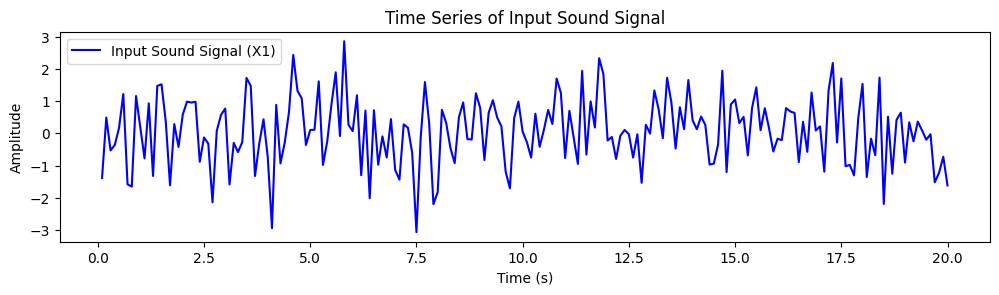

In [4]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data['Time'], data['X1'], label='Input Sound Signal (X1)', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time Series of Input Sound Signal')
plt.legend()

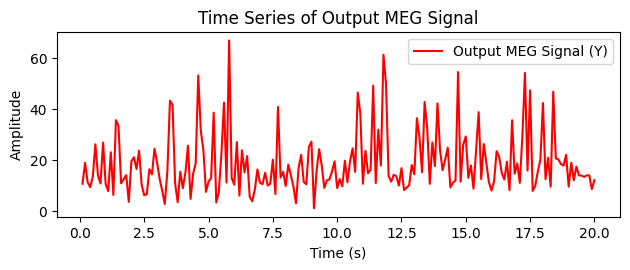

In [5]:
plt.subplot(2, 1, 2)
plt.plot(data['Time'], data['Y'], label='Output MEG Signal (Y)', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time Series of Output MEG Signal')
plt.legend()
plt.tight_layout()
plt.show()

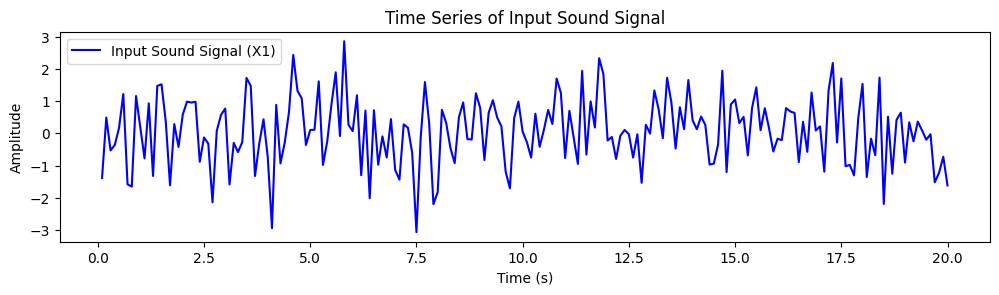

In [6]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data['Time'], data['X1'], label='Input Sound Signal (X1)', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time Series of Input Sound Signal')
plt.legend()

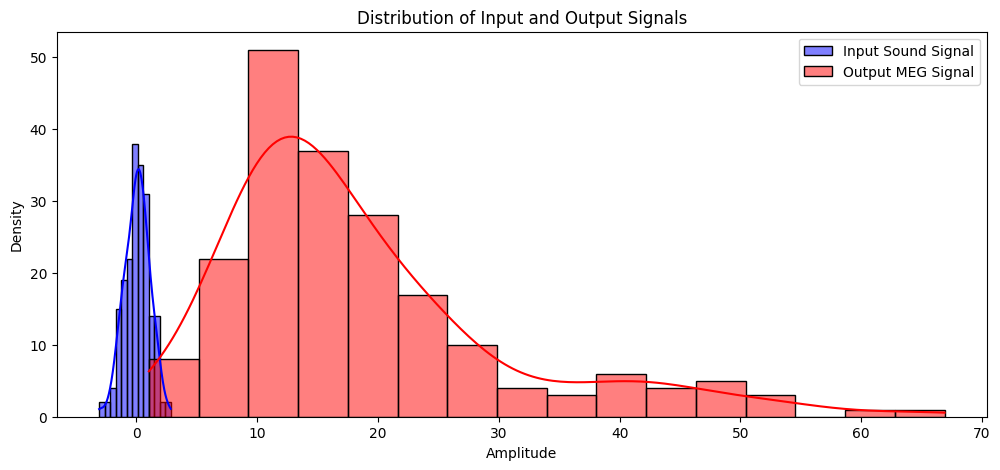

In [7]:
plt.figure(figsize=(12, 5))
sns.histplot(data['X1'], kde=True, color='blue', label='Input Sound Signal')
sns.histplot(data['Y'], kde=True, color='red', label='Output MEG Signal')
plt.xlabel('Amplitude')
plt.ylabel('Density')
plt.title('Distribution of Input and Output Signals')
plt.legend()
plt.show()

In [8]:
correlation, _ = pearsonr(data['X1'], data['Y'])
print(f"Pearson correlation between Input Sound Signal and Output MEG Signal: {correlation:.4f}")

Pearson correlation between Input Sound Signal and Output MEG Signal: 0.7654


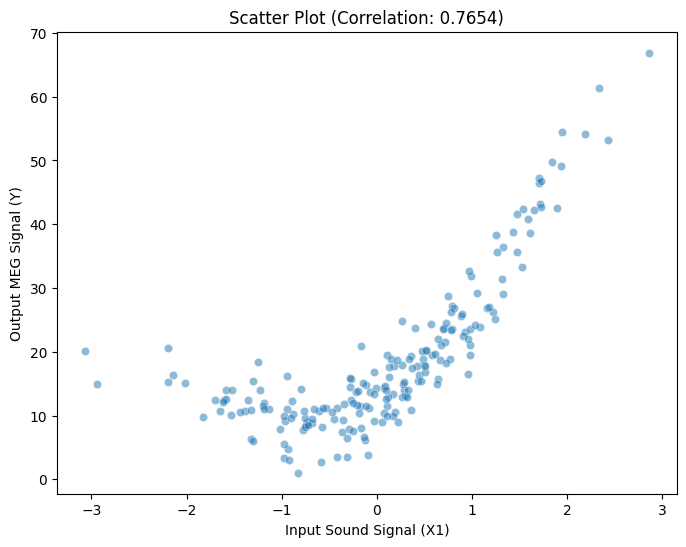

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['X1'], y=data['Y'], alpha=0.5)
plt.xlabel('Input Sound Signal (X1)')
plt.ylabel('Output MEG Signal (Y)')
plt.title(f'Scatter Plot (Correlation: {correlation:.4f})')
plt.show()

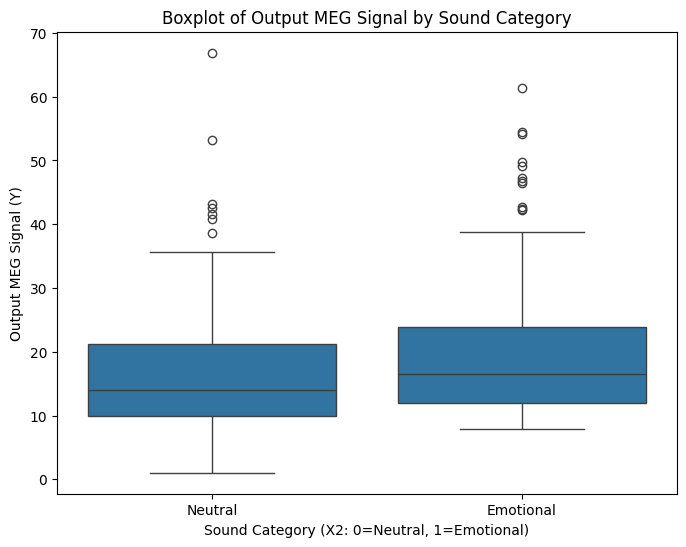

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['X2'], y=data['Y'])
plt.xlabel('Sound Category (X2: 0=Neutral, 1=Emotional)')
plt.ylabel('Output MEG Signal (Y)')
plt.title('Boxplot of Output MEG Signal by Sound Category')
plt.xticks([0, 1], ['Neutral', 'Emotional'])
plt.show()

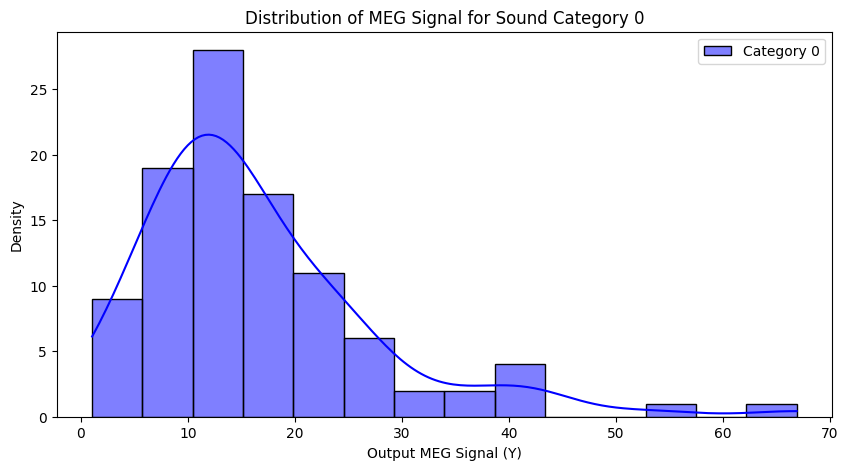

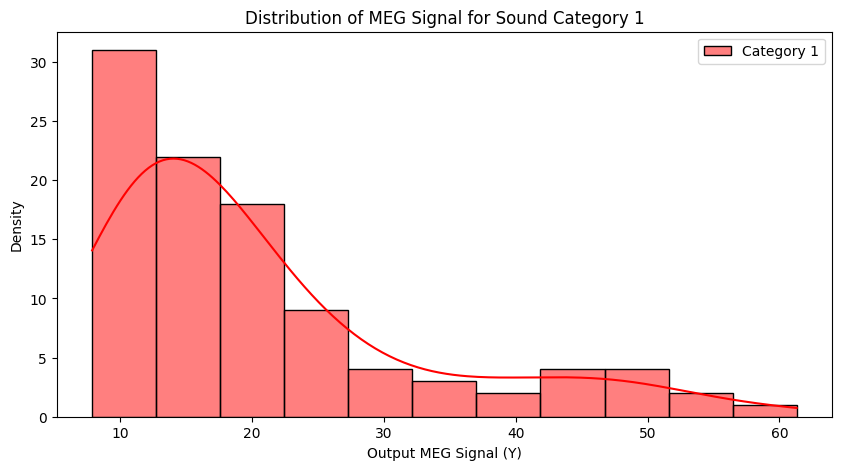

In [11]:
for category in [0, 1]:
    subset = data[data['X2'] == category]
    plt.figure(figsize=(10, 5))
    sns.histplot(subset['Y'], kde=True, label=f'Category {category}', color=['blue', 'red'][category])
    plt.xlabel('Output MEG Signal (Y)')
    plt.ylabel('Density')
    plt.title(f'Distribution of MEG Signal for Sound Category {category}')
    plt.legend()
    plt.show()

## Task 2

## Task 2.1: Estimate Model Parameters using Least Squares


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [13]:
def get_features(data, model_num):
    X1, X2 = data['X1'], data['X2']
    if model_num == 1:
        X = np.column_stack([X1**3, X1**5, X2, np.ones(len(X1))])
    elif model_num == 2:
        X = np.column_stack([X1, X2, np.ones(len(X1))])
    elif model_num == 3:
        X = np.column_stack([X1, X1**2, X1**4, X2, np.ones(len(X1))])
    elif model_num == 4:
        X = np.column_stack([X1, X1**2, X1**3, X1**5, X2, np.ones(len(X1))])
    elif model_num == 5:
        X = np.column_stack([X1, X1**3, X1**4, X2, np.ones(len(X1))])
    return X

In [14]:
theta_estimates = {}
for model_num in range(1, 6):
    X = get_features(data, model_num)
    y = data['Y'].values
    theta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    theta_estimates[model_num] = theta_hat
    print(f"Model {model_num} Parameters: {theta_hat}")

Model 1 Parameters: [ 5.17127282 -0.53732529  2.20201791 16.93575071]
Model 2 Parameters: [ 8.62910686  2.81398685 16.63559026]
Model 3 Parameters: [ 8.55216135  6.24691708 -0.28296309  4.15988326 10.17369609]
Model 4 Parameters: [ 9.35397322  4.64696205 -0.57792162  0.07479626  4.34321644 10.85328261]
Model 5 Parameters: [ 8.07945806  0.31445012  0.55920502  3.96814553 14.13172537]


# Task 2.2

In [15]:
rss_values = {}
for model_num in range(1, 6):
    X = get_features(data, model_num)
    y = data['Y'].values
    y_pred = X @ theta_estimates[model_num]
    rss = np.sum((y - y_pred) ** 2)
    rss_values[model_num] = rss
    print(f"Model {model_num} RSS: {rss}")

Model 1 RSS: 11825.421352951202
Model 2 RSS: 11238.949638549428
Model 3 RSS: 1636.16760677224
Model 4 RSS: 1902.0628559965812
Model 5 RSS: 4928.31206100396


# Task 2.3

In [16]:
log_likelihoods = {}
n = len(data)

for model_num in range(1, 6):
    rss = rss_values[model_num]
    sigma_sq = rss / (n - 1)
    log_likelihood = - (n / 2) * np.log(2 * np.pi) - (n / 2) * np.log(sigma_sq) - (rss / (2 * sigma_sq))
    log_likelihoods[model_num] = log_likelihood
    print(f"Model {model_num} Log-Likelihood: {log_likelihood}")

Model 1 Log-Likelihood: -691.7579086795048
Model 2 Log-Likelihood: -686.6712912238319
Model 3 Log-Likelihood: -493.9684202727278
Model 4 Log-Likelihood: -509.0266531560953
Model 5 Log-Likelihood: -604.2324068960687


# Task 2.4

In [17]:
aic_values = {}
bic_values = {}

for model_num in range(1, 6):
    k = len(theta_estimates[model_num])  # Number of parameters
    log_likelihood = log_likelihoods[model_num]

    aic = 2 * k - 2 * log_likelihood
    bic = k * np.log(n) - 2 * log_likelihood

    aic_values[model_num] = aic
    bic_values[model_num] = bic

    print(f"Model {model_num}: AIC={aic}, BIC={bic}")

Model 1: AIC=1391.5158173590096, BIC=1404.7090868252017
Model 2: AIC=1379.3425824476637, BIC=1389.2375345473079
Model 3: AIC=997.9368405454557, BIC=1014.4284273781958
Model 4: AIC=1030.0533063121907, BIC=1049.8432105114787
Model 5: AIC=1218.4648137921374, BIC=1234.9564006248777


# Task 2.5

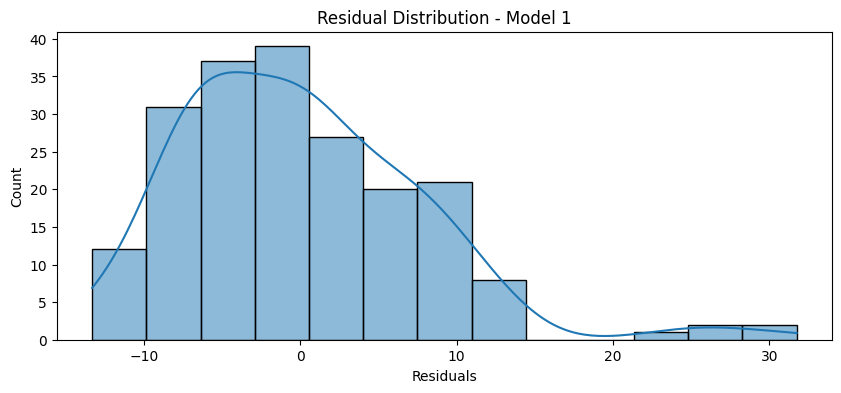

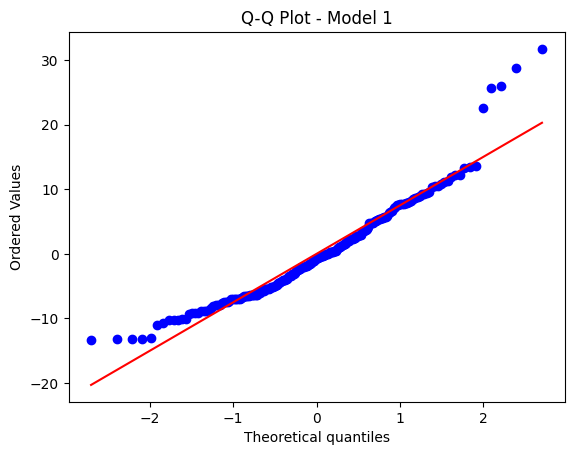

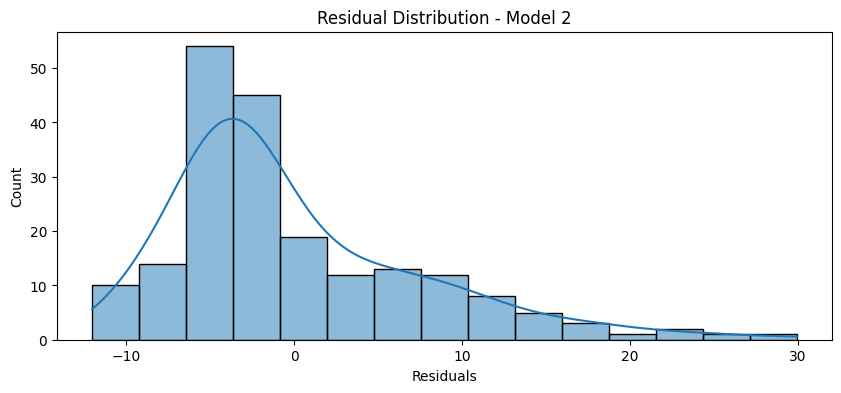

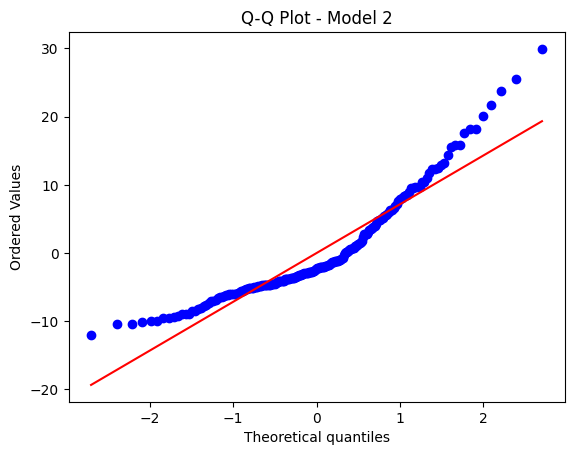

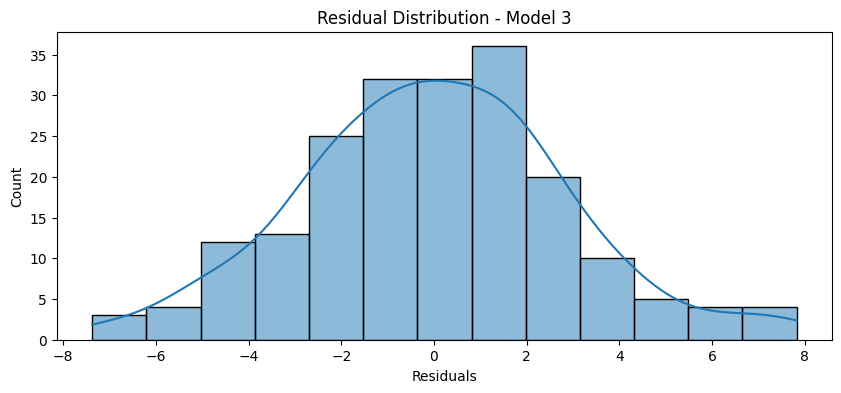

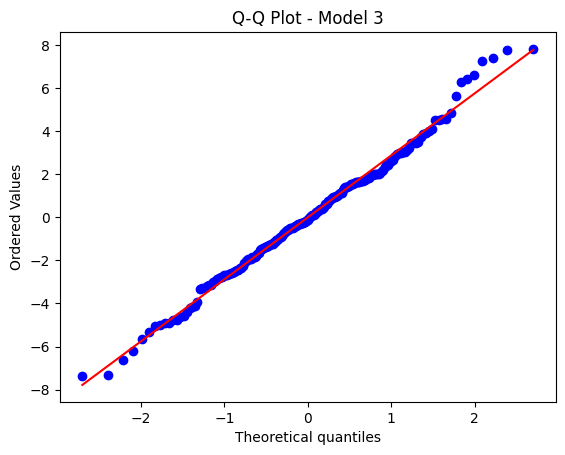

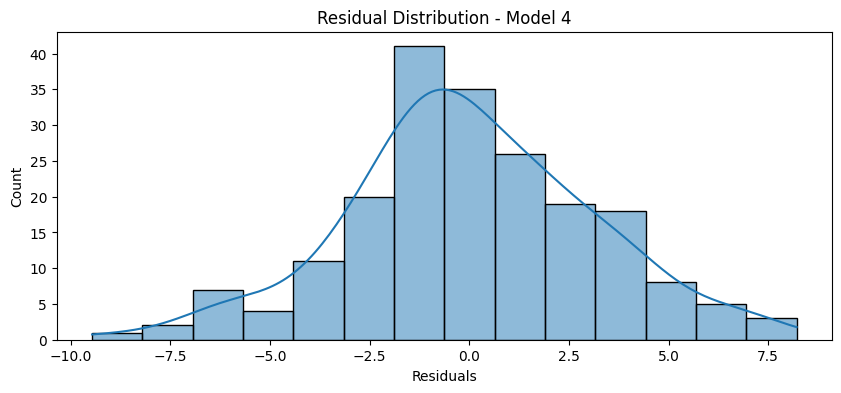

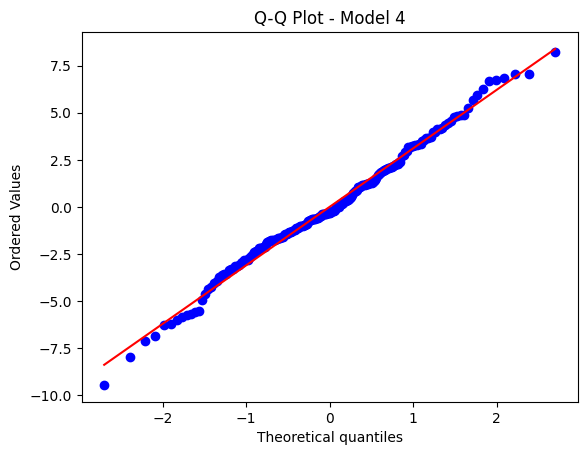

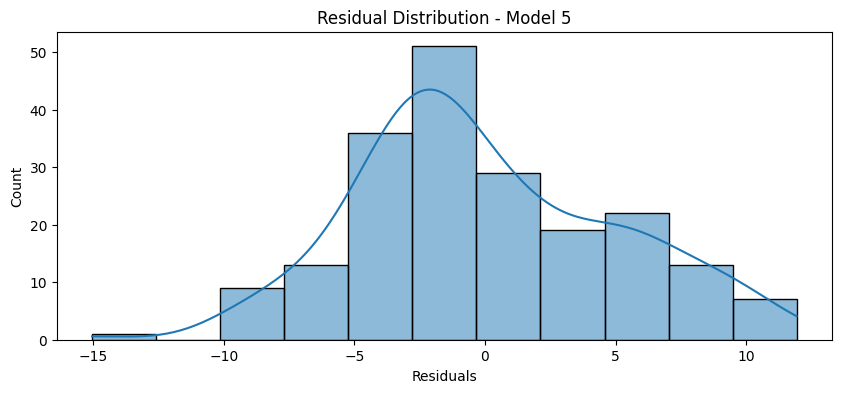

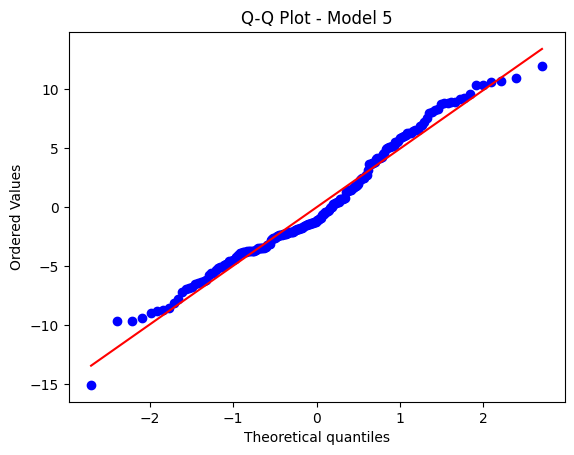

In [18]:
import scipy.stats as stats

for model_num in range(1, 6):
    X = get_features(data, model_num)
    y = data['Y'].values
    y_pred = X @ theta_estimates[model_num]
    residuals = y - y_pred

    plt.figure(figsize=(10, 4))
    sns.histplot(residuals, kde=True)
    plt.title(f"Residual Distribution - Model {model_num}")
    plt.xlabel("Residuals")
    plt.show()

    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot - Model {model_num}")
    plt.show()

# Task 2.7

In [19]:
def get_features(data, model_num):
    X1, X2 = data['X1'], data['X2']
    if model_num == 1:
        X = np.column_stack([X1**3, X1**5, X2, np.ones(len(X1))])
    elif model_num == 2:
        X = np.column_stack([X1, X2, np.ones(len(X1))])
    elif model_num == 3:
        X = np.column_stack([X1, X1**2, X1**4, X2, np.ones(len(X1))])
    elif model_num == 4:
        X = np.column_stack([X1, X1**2, X1**3, X1**5, X2, np.ones(len(X1))])
    elif model_num == 5:
        X = np.column_stack([X1, X1**3, X1**4, X2, np.ones(len(X1))])
    return X

In [20]:
best_model = 3

In [21]:
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

In [22]:
X_train = get_features(train_data, best_model)
y_train = train_data['Y'].values
X_test = get_features(test_data, best_model)
y_test = test_data['Y'].values

In [23]:
theta_best = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

In [24]:
y_pred = X_test @ theta_best

In [25]:
n_train = len(y_train)
rss = np.sum((y_train - X_train @ theta_best) ** 2)
sigma_sq = rss / (n_train - 1)

In [26]:
cov_matrix = np.linalg.inv(X_train.T @ X_train)  # Covariance matrix of parameters
std_error = np.sqrt(sigma_sq * np.sum(X_test @ cov_matrix * X_test, axis=1))  # Standard error of predictions

In [27]:
ci_upper = y_pred + 1.96 * std_error
ci_lower = y_pred - 1.96 * std_error

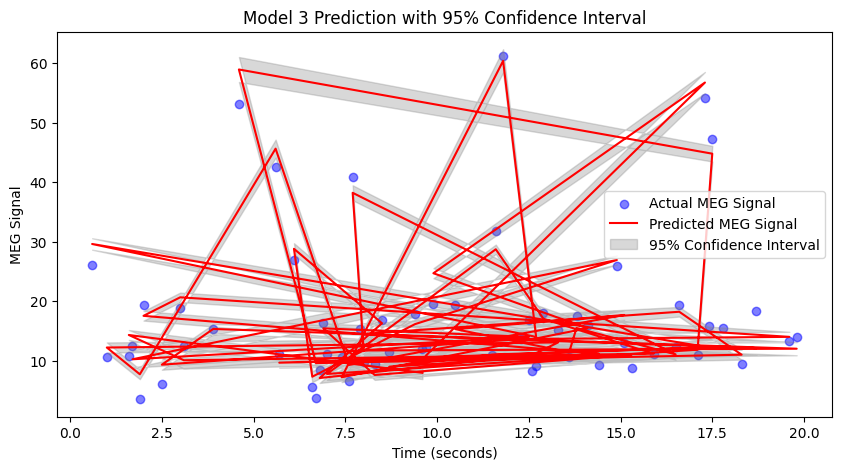

In [28]:
plt.figure(figsize=(10, 5))
plt.scatter(test_data['Time'], y_test, label="Actual MEG Signal", color="blue", alpha=0.5)
plt.plot(test_data['Time'], y_pred, label="Predicted MEG Signal", color="red")
plt.fill_between(test_data['Time'], ci_lower, ci_upper, color='gray', alpha=0.3, label="95% Confidence Interval")
plt.xlabel("Time (seconds)")
plt.ylabel("MEG Signal")
plt.title(f"Model {best_model} Prediction with 95% Confidence Interval")
plt.legend()
plt.show()

# Task 3

In [29]:
def get_features(data, model_num):
    X1, X2 = data['X1'], data['X2']
    if model_num == 1:
        X = np.column_stack([X1**3, X1**5, X2, np.ones(len(X1))])
    elif model_num == 2:
        X = np.column_stack([X1, X2, np.ones(len(X1))])
    elif model_num == 3:
        X = np.column_stack([X1, X1**2, X1**4, X2, np.ones(len(X1))])
    elif model_num == 4:
        X = np.column_stack([X1, X1**2, X1**3, X1**5, X2, np.ones(len(X1))])
    elif model_num == 5:
        X = np.column_stack([X1, X1**3, X1**4, X2, np.ones(len(X1))])
    return X

In [30]:
best_model = 3

In [31]:
X_full = get_features(data, best_model)
y_full = data["Y"].values

In [32]:
theta_ls = np.linalg.inv(X_full.T @ X_full) @ X_full.T @ y_full

In [33]:
top_2_indices = np.argsort(np.abs(theta_ls))[-2:]  # Indices of the 2 largest absolute values
theta_fixed = theta_ls.copy()  # Copy all estimated parameters
theta_fixed[top_2_indices] = 0  # Set top-2 parameters to 0 (we estimate them)

In [34]:
prior_range = 0.5  # Adjust range as needed
theta1_prior = np.random.uniform(theta_ls[top_2_indices[0]] - prior_range,
                                 theta_ls[top_2_indices[0]] + prior_range, 10000)
theta2_prior = np.random.uniform(theta_ls[top_2_indices[1]] - prior_range,
                                 theta_ls[top_2_indices[1]] + prior_range, 10000)

In [35]:
accepted_theta1 = []
accepted_theta2 = []

In [36]:
threshold = 0.01 * np.var(y_full)
for i in range(len(theta1_prior)):
    theta_test = theta_fixed.copy()
    theta_test[top_2_indices[0]] = theta1_prior[i]
    theta_test[top_2_indices[1]] = theta2_prior[i]

    y_sim = X_full @ theta_test

    error = np.sum((y_full - y_sim) ** 2)

    accepted_theta1.append(theta1_prior[i])
    accepted_theta2.append(theta2_prior[i])

accepted_theta1 = np.array(accepted_theta1)
accepted_theta2 = np.array(accepted_theta2)

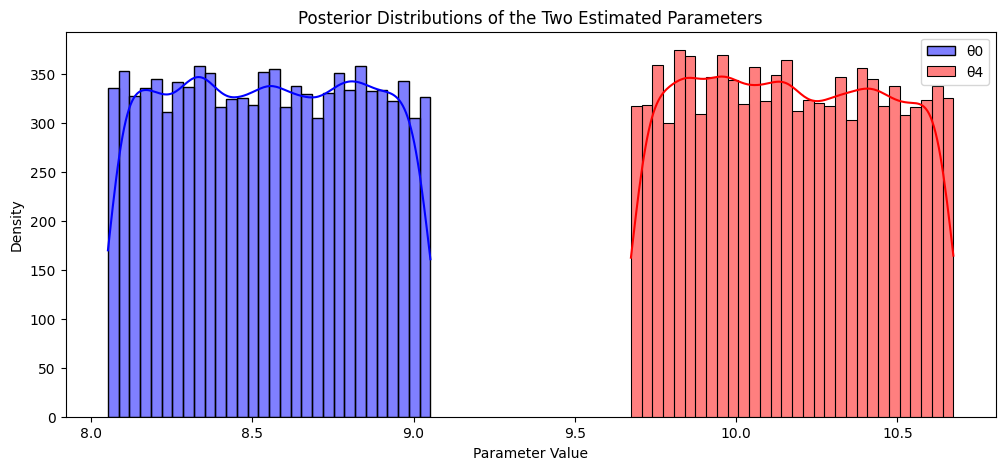

In [37]:
plt.figure(figsize=(12, 5))
sns.histplot(accepted_theta1, kde=True, bins=30, color="blue", label=f"θ{top_2_indices[0]}")
sns.histplot(accepted_theta2, kde=True, bins=30, color="red", label=f"θ{top_2_indices[1]}")
plt.xlabel("Parameter Value")
plt.ylabel("Density")
plt.title("Posterior Distributions of the Two Estimated Parameters")
plt.legend()
plt.show()

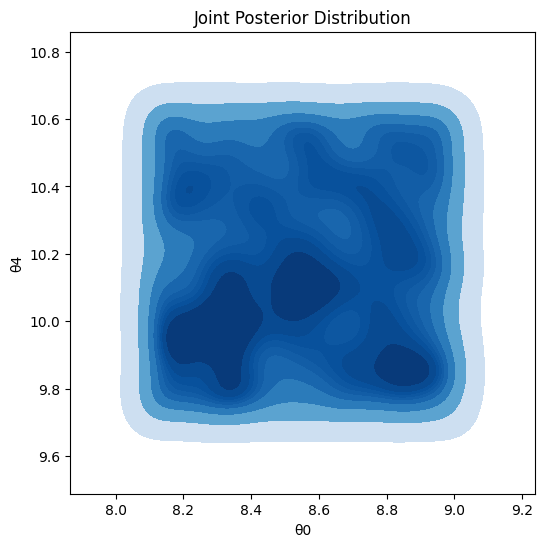

In [38]:
plt.figure(figsize=(6, 6))
sns.kdeplot(x=accepted_theta1, y=accepted_theta2, cmap="Blues", fill=True)
plt.xlabel(f"θ{top_2_indices[0]}")
plt.ylabel(f"θ{top_2_indices[1]}")
plt.title("Joint Posterior Distribution")
plt.show()